# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
# loading dataset
dat = pd.read_csv('data/spambase.data',header=None)
X = dat.values[:,:-1]
y = dat.values[:,-1]

In [3]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [4]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=30,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 5.190e-01 3.632e-01 1.220e-01
     1 5.251e-01 3.879e-01 1.158e-01
     2 3.472e-01 1.783e-01 1.385e-01
     3 2.943e-01 1.421e-01 1.368e-01
     4 2.733e-01 8.786e-02 1.399e-01
     5 2.570e-01 1.252e-01 1.453e-01
     6 2.601e-01 1.365e-01 1.292e-01
     7 2.559e-01 1.623e-01 1.370e-01
     8 2.444e-01 1.957e-01 1.269e-01
     9 2.450e-01 2.039e-01 1.358e-01
  iter    f_best   acq_best    sigma_f
    10 2.474e-01 1.835e-01 1.514e-01
    11 2.524e-01 2.074e-01 1.334e-01
    12 2.527e-01 2.033e-01 1.478e-01
    13 2.529e-01 2.040e-01 1.406e-01
    14 2.491e-01 2.133e-01 1.432e-01
    15 2.473e-01 2.249e-01 1.203e-01
    16 2.483e-01 2.187e-01 1.262e-01
    17 2.479e-01 2.247e-01 1.248e-01
    18 2.466e-01 2.291e-01 1.274e-01
    19 2.464e-01 2.293e-01 1.298e-01
  iter    f_best   acq_best    sigma_f
    20 2.451e-01 2.255e-01 1.334e-01
    21 2.442e-01 2.125e-01 1.378e-01
    22 2.447e-01 2.296e-01 1.189e-01
    23 2.458e-01 2.314e-01 1.341

{'x_best': array([3.84977906e+02, 7.86209952e-04]),
 'f_best': 0.2443663377764812,
 'acq_cand': 0.23039350443849857,
 'x_cand': array([5.25472099e+02, 1.03160094e-03])}

In [8]:
opt.gp.k1_[0].theta

array([-0.4778905 , -0.8524949 , -3.75050357])

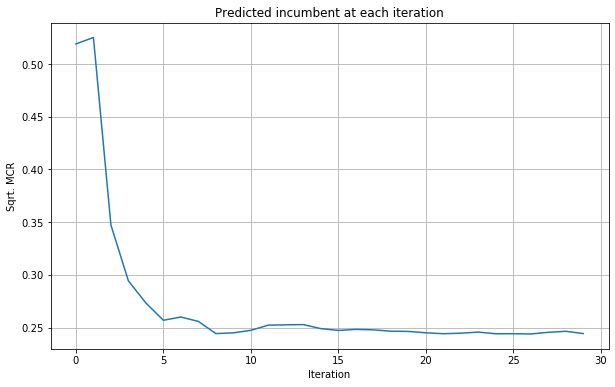

In [6]:
plt.figure(figsize=(10,6))
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt. MCR')
plt.title('Predicted incumbent at each iteration')
plt.grid()
plt.show()

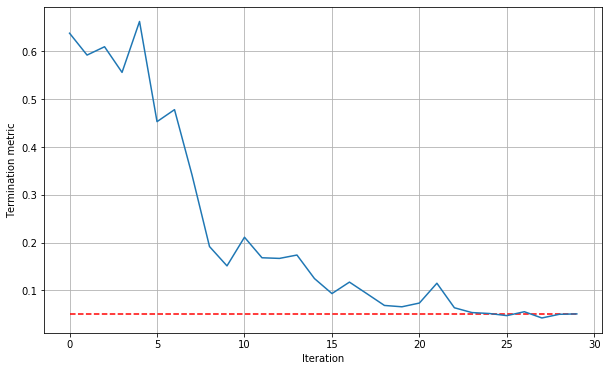

In [7]:
# plotting termination metric
plt.figure(figsize=(10,6))
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.grid()
plt.show()

In [9]:
pd.DataFrame(opt.gp.hypers)

,0,1,2,3,4,5,6
0,0.564219,-0.477890,-0.852495,-3.750504,-9.971332,-11.320433,-10.476319
1,0.579087,-0.068180,-0.728968,-3.825086,-8.244152,-8.810858,-10.990224
2,0.567361,-0.359352,-0.943846,-4.834917,-8.881104,-10.087184,-11.110120
3,0.530178,-0.876058,-1.037936,-3.829019,-10.050569,-10.390939,-10.291960
4,0.523393,-0.508512,-0.959655,-4.428991,-8.701396,-10.040258,-11.176662
5,0.494748,-0.642906,-0.721177,-4.568076,-8.863106,-12.088702,-10.133133
6,0.603668,-0.436395,-0.822302,-4.112940,-9.273930,-7.737074,-10.729308
7,0.499322,-0.370989,-0.996732,-5.292102,-8.669590,-10.544029,-11.410049
8,0.561766,-0.354334,-1.246054,-4.264067,-13.170513,-10.406843,-10.292436
9,0.493747,-0.389027,-1.030066,-3.770328,-9.428970,-7.378608,-10.588507
